In [2]:
!pip install langdetect matplotlib

In [3]:
import pandas as pd
from tqdm import tqdm

# Read the CSV file
df = pd.read_csv("classification_top_5.csv")

# Extract the desired columns
columns = ["id", "title", "description","pred_code", "pred_label"]
df_subset = df[columns]
# Drop duplicates
df_subset.drop_duplicates(subset="description", inplace=True)
# Drop rows with missing values
df_subset.dropna(inplace=True)

In [4]:
from langdetect import detect
# Create an empty list to store the detected languages
languages = []

# Iterate over each description in the dataset
for description in tqdm(df_subset["description"]):
    try:
        # Detect the language of the description
        language = detect(description)
        
        # Add the detected language to the list
        languages.append(language)      
    except:
        # Handle any errors that occur during language detection
        print("Error detecting language")
        languages.append("Unknown")

# Count the occurrences of each language
language_counts = pd.Series(languages).value_counts()

# List the unique languages
unique_languages = language_counts.index.tolist()

# Print the language counts and unique languages
print("Language Counts:")
print(language_counts)
print("Unique Languages:")
print(unique_languages)


100%|██████████| 25072/25072 [01:22<00:00, 302.37it/s]

Language Counts:
en    19690
pl      582
it      552
bg      504
de      440
ro      425
sl      355
hu      209
nl      206
pt      204
fr      204
es      202
sv      200
cs      200
et      196
sk      166
lt      160
el      158
fi      136
lv       97
hr       85
da       80
ca        9
ru        8
af        2
tl        1
no        1
Name: count, dtype: int64
Unique Languages:
['en', 'pl', 'it', 'bg', 'de', 'ro', 'sl', 'hu', 'nl', 'pt', 'fr', 'es', 'sv', 'cs', 'et', 'sk', 'lt', 'el', 'fi', 'lv', 'hr', 'da', 'ca', 'ru', 'af', 'tl', 'no']


<Axes: >

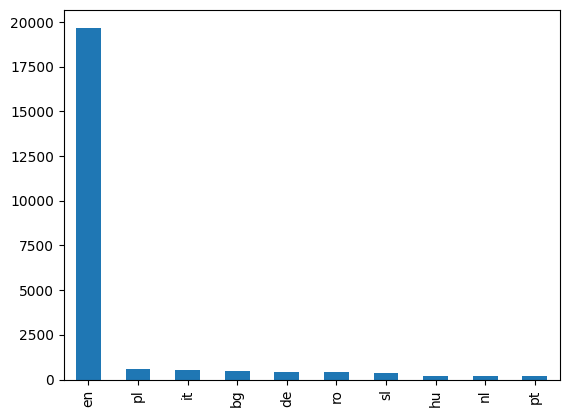

In [5]:
language_counts[:10].plot(kind='bar')

In [6]:
df_subset["language"] = languages

In [7]:
df_subset.head(5)

,id,title,description,pred_code,pred_label,language
0,872828466,Panel & Paint Technician,panel paint technician required in colchester...,"7132, 7231, 8122, 9122, 9329","Spray painters and varnishers, Motor vehicle m...",en
1,839465958,"Lärare i slöjd och teknik för årkurs 7-9, Ljun...",sista ansökningsdatum 1 juni 2021 referensnumm...,"2529, 1330, 4222, 2513, 3314",Database and network professionals not elsewhe...,sv
2,857077872,Consultants in Emergency Medicine - Doughiska,the galway clinic is a leading 146 bed state o...,"2240, 2212, 3259, 2221, 2211","Paramedical practitioners, Specialist medical ...",en
3,801801567,Senior IT Support Engineers,my client who has been continually growing thr...,"1330, 3512, 3333, 2523, 2433",Information and communications technology serv...,en
4,855162927,Commercial Sales Representatives,jobbtitel commercial sales representatives abo...,"5244, 4221, 2433, 3333, 3322","Contact centre salespersons, Travel consultant...",en


In [1]:
import importlib
parse = importlib.import_module("llm-scripts.parse")
import pandas as pd
import json
# Parse the final prediction from gemini_log.txt
text = open("llm_logs/gemini_log.txt", "r").read()
final_prediction = parse.parse_final_prediction(text)
gemini_df_final_prediction = pd.DataFrame(json.loads(final_prediction))

[]


In [2]:
gemini_df_final_prediction

,Job Ad ID,ISCO Code
0,872828466,7132
1,839465958,*Not applicable*
2,857077872,2212
3,801801567,3512
4,855162927,3322
...,...,...
16066,817955539,2421
16067,738429849,1439
16068,846214203,2431
16069,847979287,3411


In [6]:
gemini_df_final_prediction["Job Ad ID"] = gemini_df_final_prediction["Job Ad ID"].astype("int64")

In [4]:
import importlib
parse = importlib.import_module("llm-scripts.parse")
import pandas as pd
import json
# Parse the final prediction from gemini_log.txt
text = open("llm_logs/gemma_log.txt", "r").read()
final_prediction = parse.parse_final_prediction(text)
gemma_df_final_prediction = pd.DataFrame(json.loads(final_prediction))

In [5]:
gemma_df_final_prediction

,Job Ad ID,ISCO Code
0,842132656,1324
1,880528881,7115
2,793143661,9313
3,880037175,4311
4,874021778,9112
...,...,...
9016,805207067,2431
9017,832648555,2221
9018,787692878,1345
9019,768784799,1439


In [7]:
gemma_df_final_prediction["Job Ad ID"] = gemma_df_final_prediction["Job Ad ID"].astype("int64")

In [8]:
gemini_df_final_prediction, gemma_df_final_prediction

(       Job Ad ID         ISCO Code
 0      872828466              7132
 1      839465958  *Not applicable*
 2      857077872              2212
 3      801801567              3512
 4      855162927              3322
 ...          ...               ...
 16066  817955539              2421
 16067  738429849              1439
 16068  846214203              2431
 16069  847979287              3411
 16070  893932713              5246
 
 [16071 rows x 2 columns],
       Job Ad ID ISCO Code
 0     842132656      1324
 1     880528881      7115
 2     793143661      9313
 3     880037175      4311
 4     874021778      9112
 ...         ...       ...
 9016  805207067      2431
 9017  832648555      2221
 9018  787692878      1345
 9019  768784799      1439
 9020  785620741      5414
 
 [9021 rows x 2 columns])

In [19]:
merged_df = pd.merge(gemini_df_final_prediction, gemma_df_final_prediction, on="Job Ad ID", how="outer", sort=False)

In [22]:
merged_df

,Job Ad ID,ISCO Code_x,ISCO Code_y
0,713904265,1330,NaN
1,713909767,2411,NaN
2,713910279,NaN,1219
3,713919416,3332,NaN
4,713924922,3320,NaN
...,...,...,...
22421,908157293,1349,NaN
22422,909012557,2523,NaN
22423,909224497,2513,NaN
22424,909878860,2511,NaN


In [23]:
merged_df["final_prediction"] = merged_df.apply(lambda x: x["ISCO Code_y"] if pd.isnull(x["ISCO Code_x"]) else x["ISCO Code_x"], axis=1)

In [26]:
merged_df = merged_df[["Job Ad ID", "final_prediction"]]

In [25]:
df = pd.read_csv("classification_top_10_new.csv")

# Extract the desired columns
columns = ["id", "pred_code"]
top_10_df = df[columns]
top_10_df

,id,pred_code
0,872828466,"7231, 7131, 7534, 7132, 9122, 3115, 5245, 7234..."
1,839465958,"2341, 2353, 2352, 2355, 2320, 2342, 2330, 2356..."
2,857077872,"2211, 2212, 1342, 3258, 2221, 2240, 3259, 3252..."
3,801801567,"3512, 2523, 3513, 2522, 2512, 2511, 2529, 3511..."
4,855162927,"3322, 2433, 2434, 1221, 2431, 5244, 3321, 3323..."
...,...,...
25075,862998979,"5244, 5242, 3322, 3432, 2163, 2434, 5243, 2166..."
25076,793143661,"5414, 5311, 1341, 9510, 9312, 5412, 5113, 5419..."
25077,725881734,"2513, 2166, 2512, 2431, 2421, 2514, 2511, 1431..."
25078,880528881,"7115, 7111, 1323, 3123, 7522, 7121, 7523, 7122..."


In [29]:
top_10_df["id"] = top_10_df["id"].astype("int64")

/tmp/ipykernel_1006763/2519933970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_df["id"] = top_10_df["id"].astype("int64")


In [30]:
merged_final_df = pd.merge(merged_df, top_10_df, left_on="Job Ad ID", right_on="id", how="outer")

In [32]:
merged_final_df["final_prediction"] = merged_final_df.apply(lambda x: x["pred_code"].split(",")[0] if pd.isnull(x["final_prediction"]) else x["final_prediction"], axis=1)

In [36]:
import pandas as pd
# Convert final_prediction column to numeric type
merged_final_df["final_prediction_numeric"] = pd.to_numeric(merged_final_df["final_prediction"], errors="coerce")
merged_final_df["final_prediction_numeric"] = merged_final_df.apply(lambda x: x["pred_code"].split(",")[0] if pd.isnull(x["final_prediction_numeric"]) else x["final_prediction_numeric"], axis=1)

In [38]:
merged_final_df = merged_final_df[["id", "final_prediction_numeric"]]

In [40]:
merged_final_df["final_prediction_numeric"] = merged_final_df["final_prediction_numeric"].astype("int64")

/tmp/ipykernel_1006763/4031276932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_final_df["final_prediction_numeric"] = merged_final_df["final_prediction_numeric"].astype("int64")


In [45]:
merged_final_df.drop_duplicates(subset='id', inplace=True)
merged_final_df


/tmp/ipykernel_1006763/3989539375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_final_df.drop_duplicates(subset='id', inplace=True)


,id,final_prediction_numeric
0,713904265,1330
1,713909767,2411
2,713910279,1219
3,713919416,3332
4,713924922,3320
...,...,...
25560,908157293,1349
25561,909012557,2523
25562,909224497,2513
25563,909878860,2511


In [46]:
merged_final_df.rename(columns={'final_prediction_numeric': 'isco_code'}, inplace=True)

/tmp/ipykernel_1006763/27773794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_final_df.rename(columns={'final_prediction_numeric': 'isco_code'}, inplace=True)


In [48]:
merged_final_df.to_csv("classification.csv", index=False, header=False)

In [ ]:
merged_df["is_top_1"] = merged_df.apply(lambda x: x["pred_code"].split(",")[0].strip() == x["ISCO Code"], axis=1)

In [ ]:
merged_df["is_top_1"].value_counts()

is_top_1
False    10669
True      4787
Name: count, dtype: int64

In [ ]:
import ast
def evaluate_string_or_number(value):
    try:
        if eval(value):
            return True
        return False
    except:
        return False

merged_df["is_predicted"] = merged_df["ISCO Code"].apply(lambda x: evaluate_string_or_number(x))

<string>:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?


In [ ]:
merged_df["is_predicted"].value_counts()

is_predicted
True     13221
False     2235
Name: count, dtype: int64

In [ ]:
merged_df[merged_df["language"] != "en"]["is_predicted"].value_counts()

is_predicted
True     1849
False    1387
Name: count, dtype: int64

In [ ]:
merged_df[merged_df["language"] == "en"]["is_predicted"].value_counts()

is_predicted
True     11372
False      848
Name: count, dtype: int64

In [ ]:
merged_df[merged_df["language"] == "en"][merged_df["is_predicted"] == False]

/tmp/ipykernel_41369/2739223305.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  merged_df[merged_df["language"] == "en"][merged_df["is_predicted"] == False]


,id,title,description,pred_code,pred_label,language,Job Ad ID,ISCO Code,ISCO Title,Confidence,is_top_1,is_predicted
23,733493217,Fundraising events day volunteer (Cumbria),get involved with our fundraising team as an e...,"3258, 9510, 3423, 3253, 3412","Ambulance workers, Street and related service ...",en,733493217,N/A (No direct match),N/A (No direct match),0.5,False,False
25,879858279,Activities Coordinator,find a job search results job details activiti...,"1343, 1341, 5311, 5322, 1344","Aged care services managers, Child care servic...",en,879858279,N/A (Not directly classified),Activities Coordinator (or similar),0.7,False,False
30,883947737,Content Operations Intern (6 month FTC) - London,description position at retailmenot the role w...,"5221, 5222, 1420, 5223, 5244","Shop keepers, Shop supervisors, Retail and who...",en,883947737,N/A (Not found in the provided list),N/A,0.0,False,False
33,795969959,Spanish Team Leader,interested in social media regulationonline fr...,"2513, 1439, 1330, 1114, 2422","Web and multimedia developers, Services manage...",en,795969959,N/A (No perfect match),N/A,0.5,False,False
75,818845956,Vehicle Inspector & Quality Control,at vanwise we prepare our vehicles to the high...,"9122, 7231, 8331, 8322, 5245","Vehicle cleaners, Motor vehicle mechanics and ...",en,818845956,N/A (No suitable match from the provided list),N/A,0.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
15339,778793436,Associate Quantity Surveyor,an exciting opportunity has arisen for an asso...,"3213, 2262, 1439, 1223, 2433","Pharmaceutical technicians and assistants, Pha...",en,778793436,N/A (Not available in provided list),N/A (Not available in provided list),0.0,False,False
15349,835392040,Floral Designer for Artificial Trees,floral designers for artificial trees williams...,"3432, 7316, 7317, 2163, 6112","Interior designers and decorators, Sign writer...",en,835392040,N/A (No specific ISCO code matches perfectly),Artistic Occupations (Broad category),0.7,False,False
15364,786608561,Electronic Referral System eRS Service Adminis...,we are seeking an ers electronic referral syst...,"3252, 4222, 4229, 4225, 3333",Medical records and health information technic...,en,786608561,N/A (None of the provided ISCO units are a per...,N/A,0.5,False,False
15414,830700172,Junior Treasury Manager (m/f/d) - FREE NOW,your role as part of the treasury team you are...,"1219, 1346, 3311, 4211, 1211",Business services and administration managers ...,en,830700172,N/A (No perfect match),N/A (No perfect match),0.7,False,False


### Wordcloud

In [ ]:
!pip install wordcloud

<Axes: xlabel='title'>

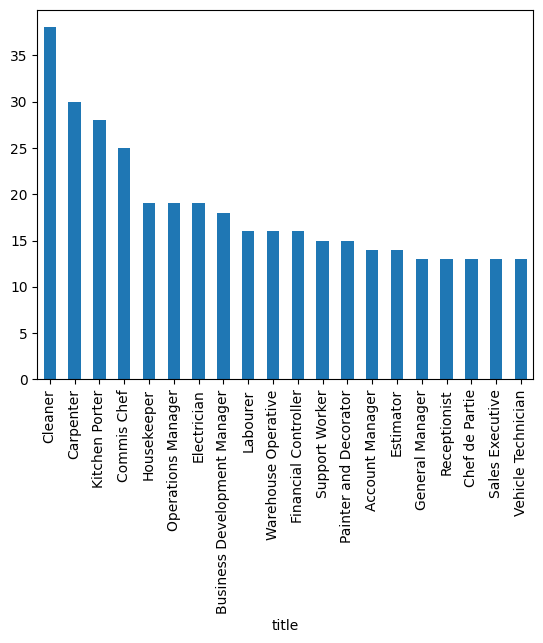

In [ ]:
duplicate_job_titles = df_subset["title"][df_subset["title"].duplicated()].value_counts()
duplicate_job_titles[:20].plot(kind='bar')

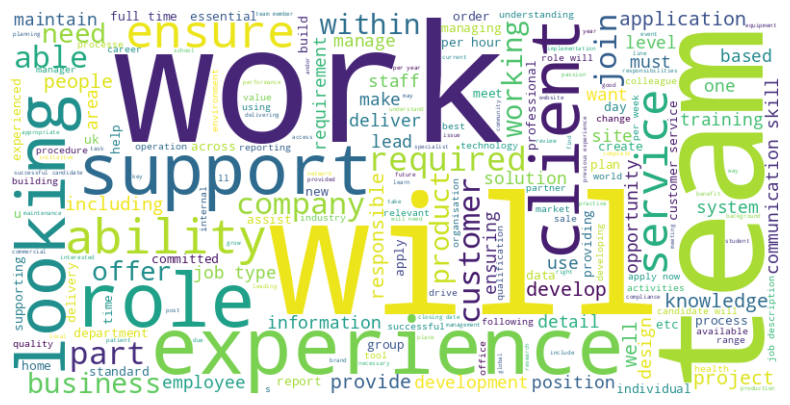

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all job descriptions into a single string
text = " ".join(description for description in df_subset["description"])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()
